# Training a classifier

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


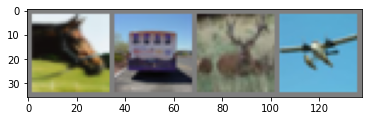

horse truck deer  plane


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.180
[1,  4000] loss: 1.842
[1,  6000] loss: 1.681
[1,  8000] loss: 1.577
[1, 10000] loss: 1.518
[1, 12000] loss: 1.446
[2,  2000] loss: 1.426
[2,  4000] loss: 1.360
[2,  6000] loss: 1.342
[2,  8000] loss: 1.328
[2, 10000] loss: 1.317
[2, 12000] loss: 1.271
Finished Training


In [10]:
net.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[ 1.6774e-01,  3.1614e-01,  4.1781e-01,  2.3448e-01,  3.1168e-02],
                        [ 2.0741e-01,  2.2380e-01,  1.4965e-01,  1.5124e-01,  2.1072e-01],
                        [ 6.6468e-02,  4.4312e-02, -9.6919e-02,  4.7323e-03,  3.2884e-01],
                        [-1.3859e-01, -2.7372e-01, -2.8258e-01, -1.5336e-01,  3.2897e-01],
                        [-2.6957e-01, -2.5129e-01, -2.8794e-01, -1.6490e-01,  1.3510e-01]],
              
                       [[-1.8453e-01, -1.3716e-01, -1.5010e-01, -1.9069e-01, -3.6475e-01],
                        [-2.2496e-01, -1.2954e-01, -2.3942e-01, -2.6187e-01, -2.9496e-01],
                        [-9.8869e-02, -8.6756e-02, -1.8816e-01, -1.5811e-01,  2.7277e-02],
                        [-8.8463e-02, -1.4705e-01, -2.9446e-01, -1.1946e-01,  2.0278e-01],
                        [-1.6130e-01, -2.5104e-01, -8.6620e-02,  8.9243e-02,  2.4015e-01]],
              
                       [[ 7.

In [9]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# Test the network on the test data

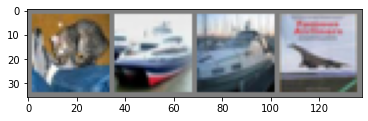

GroundTruth:  cat   ship  ship  plane


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [24]:
print(trainloader)

In [12]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [13]:
outputs = net(images)

In [14]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  ship 


In [15]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


In [25]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 63.0 %
Accuracy for class: car   is 76.3 %
Accuracy for class: bird  is 42.1 %
Accuracy for class: cat   is 24.1 %
Accuracy for class: deer  is 46.5 %
Accuracy for class: dog   is 50.2 %
Accuracy for class: frog  is 72.5 %
Accuracy for class: horse is 51.1 %
Accuracy for class: ship  is 75.2 %
Accuracy for class: truck is 56.2 %


# Training on a GPU

In [26]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
